 # **Predicting House Prices with Linear Regression**

# **Import libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [6]:
data = pd.read_csv(r'C:\Users\Dell\Documents\shifna\Housing.csv')

In [7]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Understanding our data**

In [11]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (545, 13)


In [12]:
#Identifying information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
# statistical summary of the columns of our data
data.describe(include ='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [15]:
# To count the null values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# **Exploratory Data Analysis(EDA)**

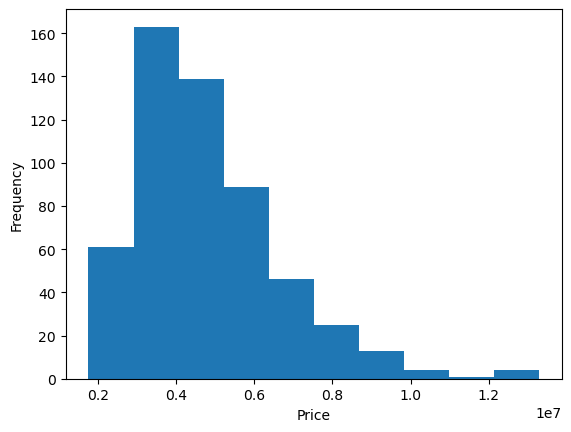

In [17]:
# Histogram of 'price'
plt.hist(data['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

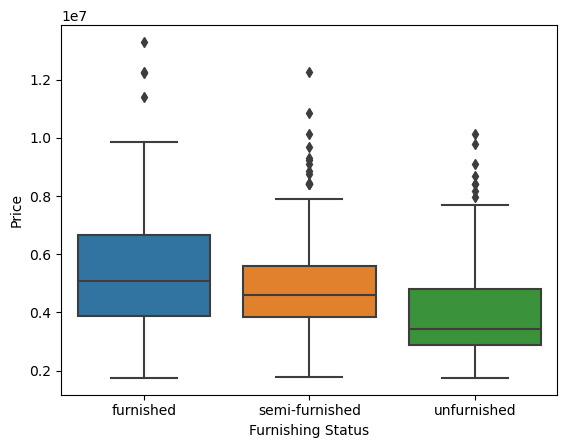

In [18]:
# Box plot of 'price' vs. 'furnishingstatus'
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

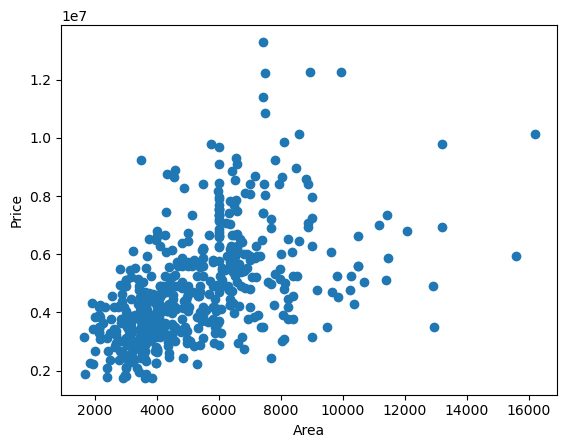

In [19]:
# Scatter plot of 'area' vs. 'price'
plt.scatter(data['area'], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

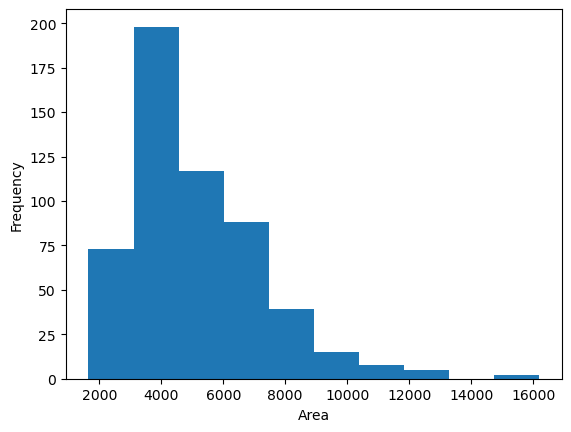

In [20]:
# Histogram of 'area'
plt.hist(data['area'], bins=10)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

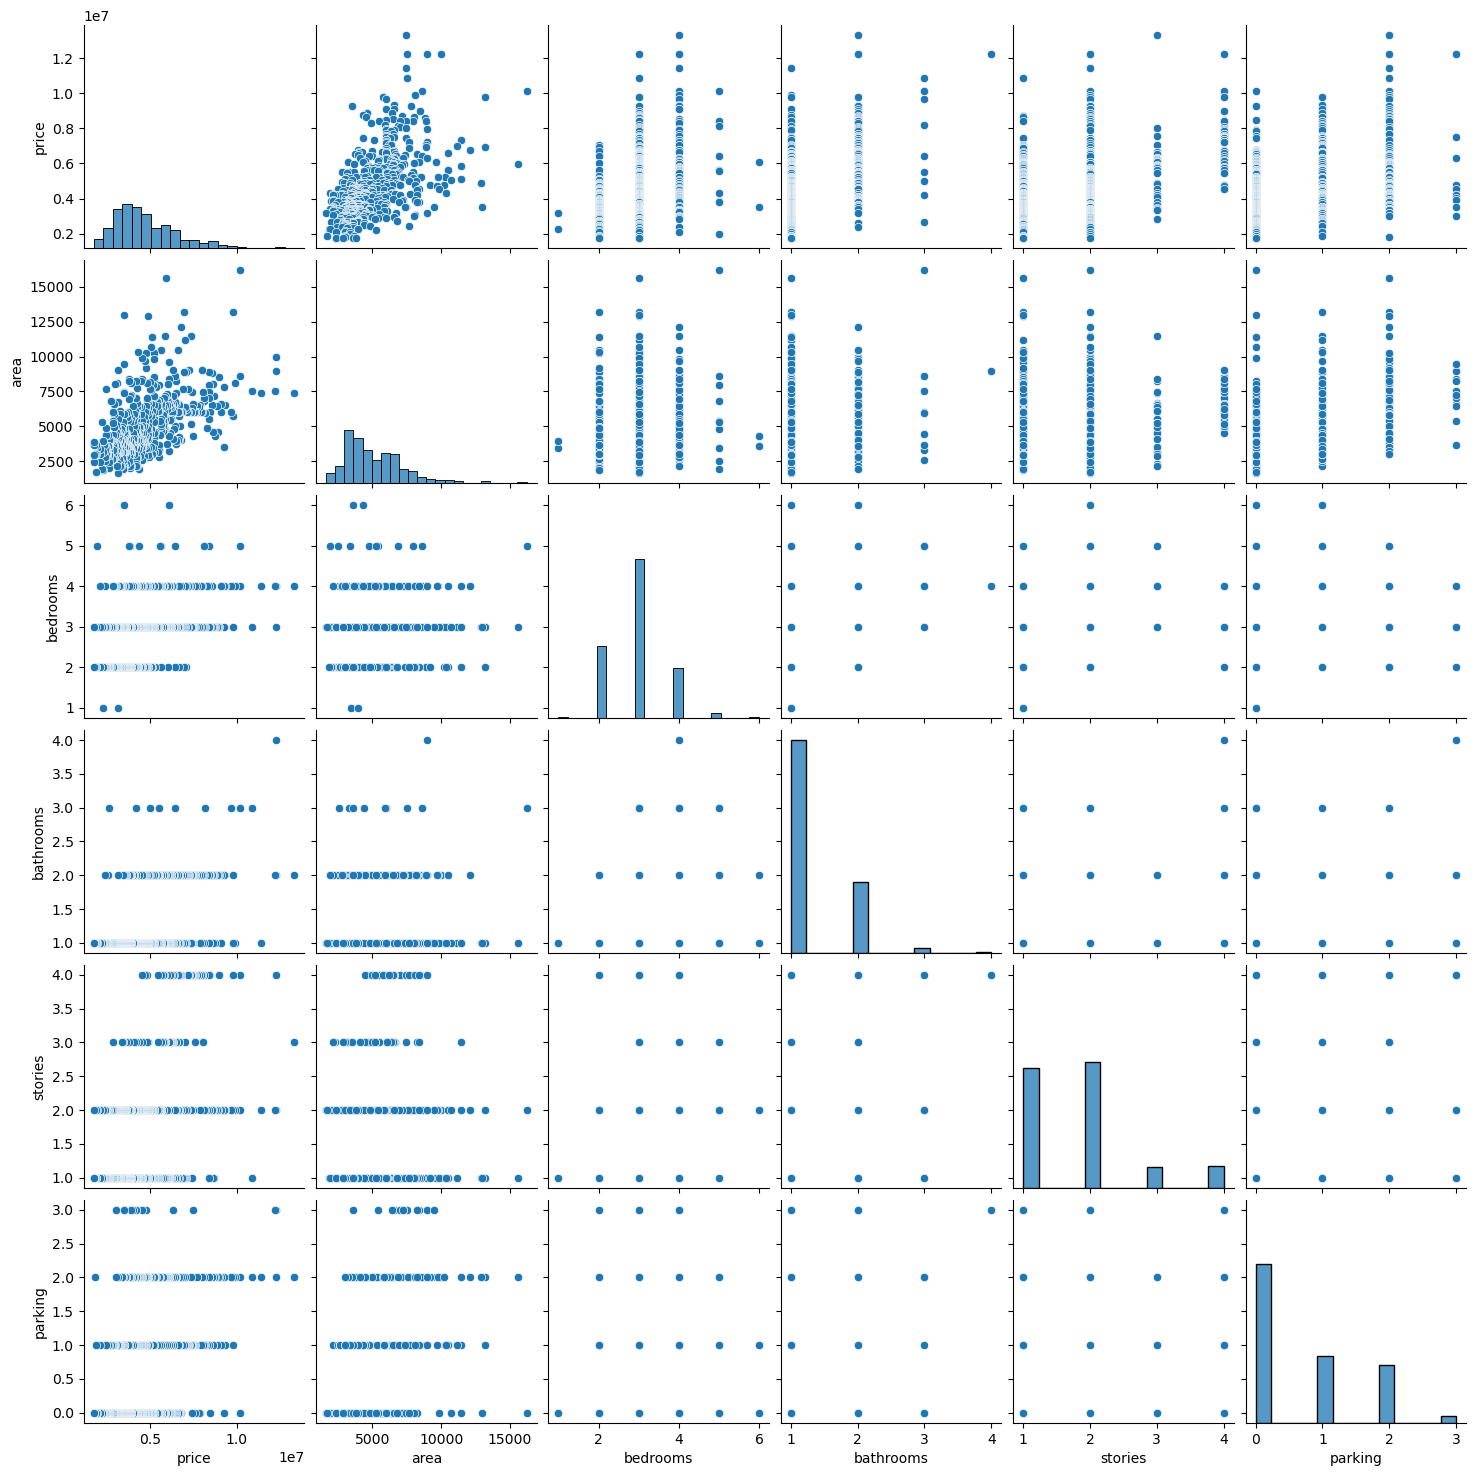

In [21]:
sns.pairplot(data)
plt.show()

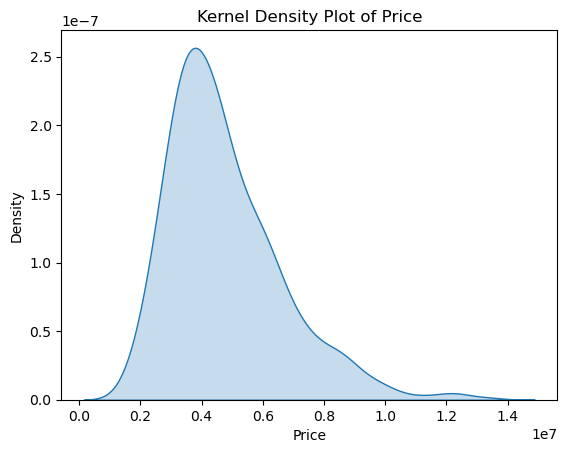

In [22]:
# Kernel Density Estimate (KDE) plot of 'price'
sns.kdeplot(data=data, x='price', fill=True)  
plt.xlabel('Price')  
plt.ylabel('Density')  
plt.title('Kernel Density Plot of Price')  
plt.show()  


# **Data Cleaning and Preparation**


#**Handling Binary Categorical Variables (Yes/No) Categories**

In [25]:
# List of categorical columns containing 'yes' and 'no' values
categorical_col =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [26]:
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [27]:

def binary_map(x):
    """
    Function to map 'yes' and 'no' values to 1 and 0, respectively.

    Parameters:
    x (pandas Series): Input Series containing 'yes' and 'no' values.

    Returns:
    pandas Series: Mapped Series with 'yes' mapped to 1 and 'no' mapped to 0.
    """
    return x.map({'yes': 1, 'no': 0})

In [28]:
# Apply the binary_map function to multiple categorical columns in the 'data' DataFrame
data[categorical_col] = data[categorical_col].apply(binary_map)

# Display the updated values of the categorical columns
data[categorical_col]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [29]:
# Display the first five rows of the DataFrame 'data' after the conversions
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#**Handling Categorical data with Dummy Variable**

In [31]:
# Generate dummy variables for the 'furnishingstatus' column
dummy_col = pd.get_dummies(data['furnishingstatus'])

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


#**furnished will be 00 and to avoid redudency we drop it. semi-furnished will be 10 and unfurnished will be 01**

In [33]:
# Regenerating dummy variables for the 'furnishingstatus' column, dropping the first category
dummy_col = pd.get_dummies(data['furnishingstatus'], drop_first=True)

# Display the first few rows of the dummy variables DataFrame
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [34]:
# Concatenate the original 'data' DataFrame with the 'dummy_col' DataFrame along columns
data = pd.concat([data, dummy_col], axis=1)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [35]:
# Drop the 'furnishingstatus' column from the DataFrame
data.drop(['furnishingstatus'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


 # **Splitting data into Training and Testing data**

In [37]:
#  features of our dataset
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [38]:
np.random.seed(0)

# Split the data into training and testing subsets
# df_train: Training subset
# df_test: Testing subset
df_train, df_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
# Display the first few rows of the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,False,False
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,False,False
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,False,True


In [40]:
# Checking the shape of training set
df_train.shape

(381, 14)

In [41]:
# Display the first few rows of the testing subset
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [42]:
# Checking the shape of training set
df_test.shape

(164, 14)

# **Scaling Training Data: MinMaxScaler**

In [44]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

In [45]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [46]:
# Scaling the specified columns in the training subset using the MinMaxScaler
df_train[col_to_scale] = scaler.fit_transform(df_train[col_to_scale])

In [47]:
# Displaying the training subset
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True


# **Training the model**

In [49]:
# Separate the target variable from the training subset
y_train = df_train.pop('price')

# Extract the remaining features as the training data
x_train = df_train

In [50]:
# To display the first few rows of the target variable in the training subset
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [51]:
# Creating an instance of LinearRegression
linear_regression = LinearRegression()

In [52]:
# Fitting the Linear Regression model to the training data
linear_regression.fit(x_train, y_train)

LinearRegression()

In [53]:
# Retrieve the coefficients of the Linear Regression model
coefficients = linear_regression.coef_

# Print the coefficients
print(coefficients)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [54]:
# Calculate the coefficient of determination (R²) for the Linear Regression model on the training data
score = linear_regression.score(x_train, y_train)

# Print the coefficient of determination (R²)
print(score)

0.6814893088451202


# **Scaling Test Data: MinMaxScaler**

In [56]:
# List of columns to scale
col_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [57]:
# Scaling the specified columns in the testing subset using the MinMaxScaler
df_test[col_to_scale] = scaler.fit_transform(df_test[col_to_scale])

# *Testing our model*

In [59]:
# Separate the target variable from the testing subset
y_test = df_test.pop('price')

# Extract the remaining features as the testing data
x_test = df_test

In [60]:
# Make predictions on the testing data using the trained Linear Regression model
prediction = linear_regression.predict(x_test)

 # *R squared value*

In [62]:
# Calculate the coefficient of determination (R²) for the predictions
r2 = r2_score(y_test, prediction)

In [63]:
r2

0.599557533872853

# **Comparing the actual and predicted values**

In [65]:
# Get the shape of y_test
y_test.shape

# Reshape y_test to a matrix with a single column
y_test_matrix = y_test.values.reshape(-1, 1)

In [66]:
# Creating a DataFrame with actual and predicted values
data_frame = pd.DataFrame({'actual': y_test_matrix.flatten(), 'predicted': prediction.flatten()})

In [67]:
# Display the first 10 rows of the DataFrame
data_frame.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


# **Plotting the Graph**

Text(0, 0.5, 'Predicted')

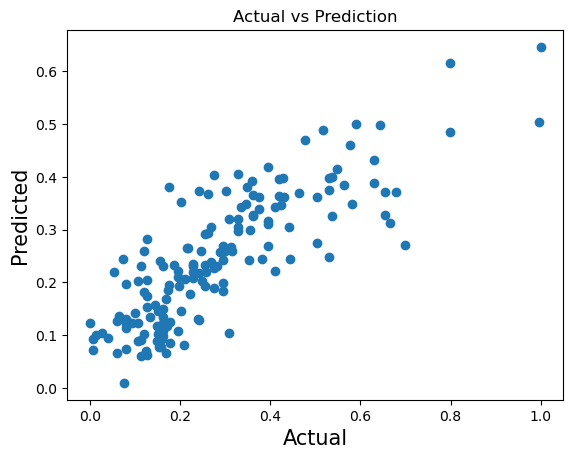

In [69]:
# Create a new figure
fig = plt.figure()

# Scatter plot of actual versus predicted values
plt.scatter(y_test, prediction)

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)